# 1. Choose a classification dataset and normalize features.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap
df = pd.read_csv('Iris.csv')  
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])
X = df.drop('Species', axis=1)
y = df['Species']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 2. Use KNeighborsClassifier from sklearn.

In [2]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# 3. Experiment with different values of K

In [3]:
print("Accuracy for different K values:")
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred_k = model.predict(X_test)
    acc = accuracy_score(y_test, pred_k)
    print(f"K={k}, Accuracy={acc:.2f}")

Accuracy for different K values:
K=1, Accuracy=0.97
K=2, Accuracy=0.93
K=3, Accuracy=0.93
K=4, Accuracy=0.93
K=5, Accuracy=0.93
K=6, Accuracy=0.93
K=7, Accuracy=0.97
K=8, Accuracy=0.93
K=9, Accuracy=0.97
K=10, Accuracy=0.97


# 4. Evaluate model using accuracy, confusion matrix.

Final Model Accuracy: 0.93


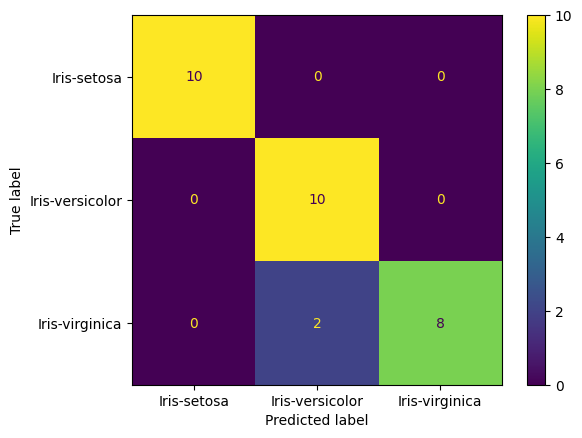

In [4]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.2f}")
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

# 5. Visualize decision boundaries.

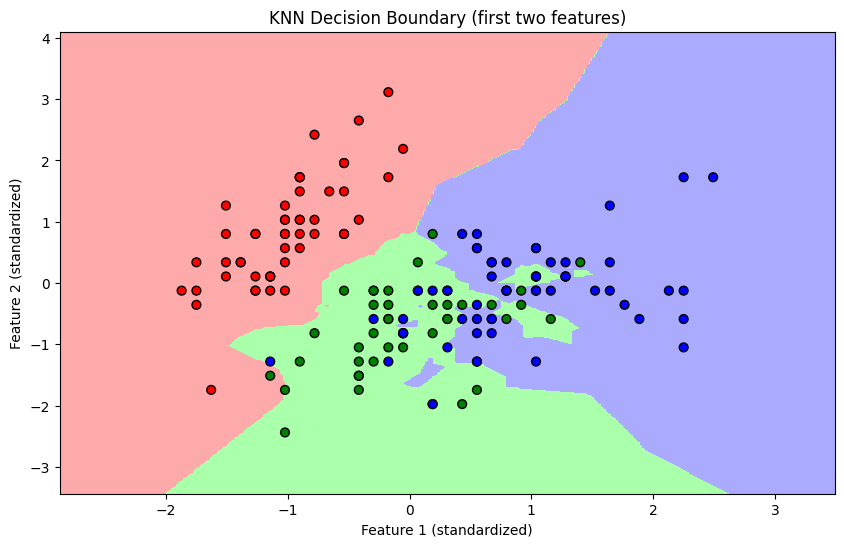

In [7]:
X_vis = X_scaled[:, :2]
y_vis = pd.Categorical(y).codes  # Convert string labels to numeric
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y_vis, test_size=0.2, random_state=42, stratify=y_vis)
knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_train_vis, y_train_vis)
h = 0.02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['red', 'green', 'blue'])
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=cmap_bold, edgecolor='k', s=40)
plt.title("KNN Decision Boundary (first two features)")
plt.xlabel("Feature 1 (standardized)")
plt.ylabel("Feature 2 (standardized)")
plt.show()